In [1]:
!pip install mxnet gluoncv

     |████████████████████████████████| 55.0MB 67kB/s 
     |████████████████████████████████| 819kB 39.4MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


***2.1 Data Manipulation***


In [2]:
# numpy compatible mxnet
from mxnet import np, npx
npx.set_np()

In [3]:
# create a vector ranging from 0 to 12.
x = np.arange(12)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
# each dimensions shape
x.shape

(12,)

In [5]:
# total elements
x.size

12

In [6]:
# reshape the 12 elements without changing them.
X = x.reshape(3, 4)
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [7]:
# a tensor of zeroes.
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [8]:
# sample from a gaussian(normal) distribution with a mean of 0 and std of 1.
np.random.normal(0, 1, size=(3, 4))

array([[ 2.2122064 ,  1.1630787 ,  0.7740038 ,  0.4838046 ],
       [ 1.0434403 ,  0.29956347,  1.1839255 ,  0.15302546],
       [ 1.8917114 , -1.1688148 , -1.2347414 ,  1.5580711 ]])

In [9]:
# elementwise exp of the x matrix.
np.exp(x)

array([1.0000000e+00, 2.7182817e+00, 7.3890562e+00, 2.0085537e+01,
       5.4598148e+01, 1.4841316e+02, 4.0342880e+02, 1.0966332e+03,
       2.9809580e+03, 8.1030840e+03, 2.2026465e+04, 5.9874141e+04])

In [10]:
# concatenation of different axes.
X = np.arange(12).reshape(3, 4)
Y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
np.concatenate([X, Y], axis=0), np.concatenate([X, Y], axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [11]:
# elementwise comparison.
X == Y

array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [12]:
# sum over all elements.
X.sum()

array(66.)

In [13]:
# The broadcasting mechanism. (good or bad?)
a = np.arange(3).reshape(3,1)
b = np.arange(2).reshape(1,2)
a, b

(array([[0.],
        [1.],
        [2.]]), array([[0., 1.]]))

In [14]:
# both arrays were extended to match each others sizes..
a + b

array([[0., 1.],
       [1., 2.],
       [2., 3.]])

In [15]:
# indexing done, as normal with np arrays.
X[-1], X[1:3]

(array([ 8.,  9., 10., 11.]), array([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]))

In [16]:
# change a single element
X[1, 2] = 9
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]])

In [17]:
# changing whole rows.
X[0:2, :] = 12
X

array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]])

In [18]:
# a new memory space is allocated each time.
before = id(Y)
Y = Y + X
id(Y) == before

False

In [19]:
# wont happen if done this way.
before = id(Y)
Y += X
id(Y) == before

True

In [20]:
# [:] also shows in place expressions, not deferencing the variable.

Z = np.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140095255098784
id(Z): 140095255098784


In [21]:
# type conversion to numpy.

A = X.asnumpy()
B = np.array(A)
type(A), type(B)

(numpy.ndarray, mxnet.numpy.ndarray)

In [22]:
# convert to python types

a = np.array([3.5])
a, a.item(), float(a), int(a)

(array([3.5]), 3.5, 3.5, 3)

***2.2 Data Preprocessing***

In [23]:
# utility function to create directories in the wanted address.
import os 
def mkdir_if_not_exist(path):
  """Make a directory if it does not exist."""
  # check if the path is a string.
  if not isinstance(path, str):
    path = os.path.join(*path)
  if not os.path.exists(path):
    os.makedirs(path)

In [24]:
# create a dataset.
data_file='../data/house_tiny.csv'
mkdir_if_not_exist('../data')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # Column names
  f.write('NA,Pave,127500\n') # Each row represents a data example
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [25]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [26]:
# fill in the NaN values,
# hint that the categorical variables dont need to be filled.
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [27]:
# create two seperate features for alley=pave and alley=nan
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [28]:
# convert to numpy for further training, or tf.constant & torch.tensor in other frameworks.
from mxnet import np

X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

***2.3 Linear Algebra***

In [29]:
# ∈: means element of, like pythons 'in' statement.
# ⊂: means subset of. 

# scalar operations.
from mxnet import np, npx
npx.set_np()

x = np.array(3.0)
y = np.array(2.0)

x + y, x * y, x / y, x ** y

(array(5.), array(6.), array(1.5), array(9.))

In [30]:
# vector
x = np.arange(4)
x

array([0., 1., 2., 3.])

In [31]:
# matrix
A = np.arange(20).reshape(5, 4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [32]:
# matrix transpose, (replacing rows and columns)
A.T

array([[ 0.,  4.,  8., 12., 16.],
       [ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.]])

In [33]:
# Special case: symmetric matrix, where the matrix and the transpose are equal.

B = np.array([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

In [34]:
# pay attention to the diagonal.
B == B.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [35]:
X = np.arange(24).reshape(2, 3, 4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [36]:
# reduction
x = np.arange(4)
x, x.sum()

(array([0., 1., 2., 3.]), array(6.))

In [37]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(array([40., 45., 50., 55.]), (4,))

In [38]:
A.sum(axis=[0, 1]) == A.sum()  # Same as `A.sum()`

array(True)

In [39]:
# obvious.
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(array([ 8.,  9., 10., 11.]), array([ 8.,  9., 10., 11.]))

In [40]:
sum_A = A.sum(axis=1, keepdims=True)

In [41]:
# culmucative sum.
A.cumsum(axis=0)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]])

In [42]:
y = np.ones(4)
x, y, np.dot(x, y)

(array([0., 1., 2., 3.]), array([1., 1., 1., 1.]), array(6.))

In [43]:
np.sum(x * y)

array(6.)

In [44]:
# matrix multiplication
B = np.ones(shape=(4, 3))
np.dot(A, B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

In [45]:
# norms
# l2 norm sqrt(sum(x**2))

u = np.array([3, -4])
np.linalg.norm(u)

array(5.)

In [46]:
# l1 norm
# less senserive to outliers.

np.abs(u).sum()

array(7.)

In [47]:
# fobenius norm (similar to that of the l2 norm for matrices).
np.linalg.norm(np.ones((4, 9)))

array(6.)

In [48]:
np.abs(np.ones((4, 9))).sum()

array(36.)

***2.4 Calculus***

In [ ]:
# differentiation.
# derivative definition:

# f'(x) = (f(x + h) - f(x)) / f(h) when h --> 0

In [50]:
import mxnet
from IPython import display
from mxnet import np, npx
npx.set_np()

# f(x) = 3x^2 - 4x
def f(x):
    return 3 * x ** 2 - 4 * x

In [57]:
# the numerical limit when x == 1 approaches 2.
# Ofc f'(x) = 6x - 4 => if x=1 > f'(x) = 2 

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

# HOW TO SOLVE: 
# set x to different values.

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 2, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003
h=0.10000, numerical limit=8.30000
h=0.01000, numerical limit=8.03000
h=0.00100, numerical limit=8.00300
h=0.00010, numerical limit=8.00030
h=0.00001, numerical limit=8.00003


In [58]:
# so the issue now is:
# ax - b = 2 for x = 1
# ax - b = 8 for x = 2
# => a = 6, b = 4

In [ ]:
# y = f(x)
# y is the dependent variable and x is the independent.

# f'(x) = dx/dy = d(f(x))/dy = df/dx = Df(x) = Dx(f(x))

In [ ]:
# differentiation rules.

# DC = 0 (C is a constant value)
# Dx^n = n*Dx^n-1
# De^x = e^x
# Dln(x) = 1/x

In [62]:
def difference(series):
  out = []
  count = len(series) - 1
  for i in range(count):
    out.append(series[i+1] - series[i])
  out.append(series[-1])
  return out

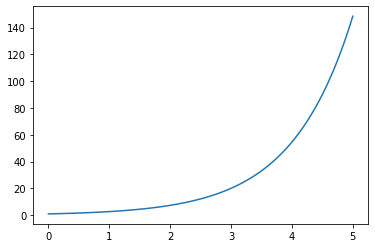

In [79]:
# plot some
import matplotlib.pyplot as plt

exp_x = np.linspace(0, 5, 1000, endpoint=True)
exponential_series = np.exp(exp_x)
plt.plot(exp_x, exponential_series)

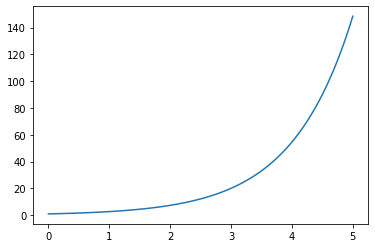

In [80]:
diff_exponential_series = difference(exponential_series)
plt.plot(exp_x, exponential_series)

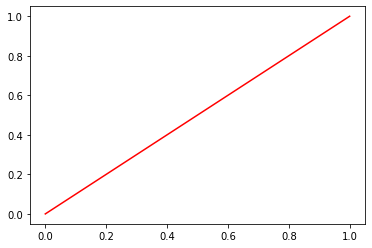

In [100]:
# plot some
import matplotlib.pyplot as plt

exp_x = np.linspace(0, 1, 1000, endpoint=True)
exponential_series = exp_x
plt.plot(exp_x, exponential_series, 'r')

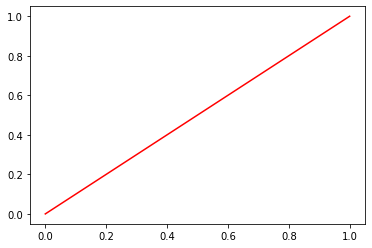

In [101]:
diff_exponential_series = difference(exponential_series)
plt.plot(exp_x, exponential_series, 'r')

In [102]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [105]:
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()

In [104]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [110]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

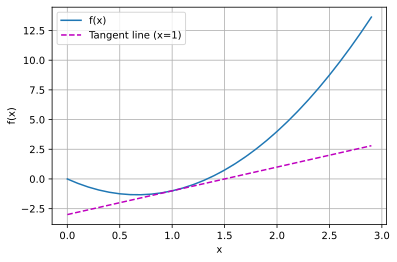

In [111]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])